# select best models

In [1]:
#grid with elastic cv
#picked gridcv bcos built in regression models

# lasso has lowest error

In [2]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import scipy as sp
from joblib import dump
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("cs1_part3_res.csv")

In [4]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
lasso_model = LassoCV(eps=0.1,n_alphas=100,cv=5)

In [7]:
lasso_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [8]:
pred_test_lasso = lasso_model.predict(X_test)

In [9]:
pred_test_lasso

array([11.91236337, 11.91595528, 12.41826713, 12.0460107 , 12.26108774,
       12.09321011, 11.80791052, 11.7428512 , 11.81745761, 11.76949155,
       12.15837619, 12.28358585, 12.56620696, 11.69047158, 11.47019239,
       12.58430369, 11.99778153, 11.52384758, 12.55337049, 11.97294076,
       11.77026485, 12.05080859, 11.51037781, 12.21500352, 11.68478073,
       12.20694043, 11.85839927, 11.77282643, 11.84684743, 12.53545263,
       12.3519943 , 12.12370603, 11.69948479, 12.34622825, 12.02619601,
       12.02224648, 12.04008744, 11.48843659, 11.93979501, 11.66808503,
       12.1861895 , 12.12380001, 12.43552119, 11.71989332, 12.46579755,
       12.47839635, 12.29765537, 12.23502922, 11.70087998, 11.78996645,
       11.88571229, 12.41415283, 11.76876294, 11.94514676, 11.82526944,
       12.11042263, 12.07507601, 12.0126862 , 12.40410768, 11.62862506,
       11.95102271, 12.12685683, 12.15217658, 12.25168391, 11.71537613,
       11.72189458, 12.26762133, 12.25454619, 11.60844128, 11.57

In [10]:
MAE_Lasso = mean_absolute_error(y_test,pred_test_lasso)
MSE_Lasso = mean_squared_error(y_test,pred_test_lasso)
RMSE_Lasso = np.sqrt(MSE_Lasso)

In [11]:
MAE_Lasso

0.10528784290850869

In [12]:
MSE_Lasso

0.022204353969770798

In [13]:
RMSE_Lasso

0.14901125450707003

In [14]:
def MAPE(y_test,pred_test_lasso):
    mape = np.mean(np.abs((y_test - pred_test_lasso)/y_test))*100
    return mape

In [15]:
LR_MAPElassocv= MAPE(y_test,pred_test_lasso)

In [16]:
print("lassocv MAPE: ",LR_MAPElassocv)

lassocv MAPE:  0.8817588132150879


# find correlation features based on lasso

In [17]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.797397
Best score using built-in LassoCV: 0.835668


In [18]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 13 variables and eliminated the other 215 variables


In [19]:
np.where(coef != 0)

(array([ 2,  9, 10, 11, 18, 22, 26, 28, 40, 43, 47, 48, 51], dtype=int64),)

In [20]:
df.columns[[2,9,10,11,18,22,26,28,40,43,47,48,51]]

Index(['lot_area', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'total_bsmt_sf', '2nd_flr_sf', 'gr_liv_area',
       'garage_yr_blt', 'garage_area', 'wood_deck_sf', 'open_porch_sf',
       'screen_porch'],
      dtype='object')

In [21]:
x = reg.coef_
x

array([-0.00000000e+00,  0.00000000e+00,  2.13273280e-06,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.23937771e-03,  1.87540881e-03,  5.78619218e-05,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  1.07212001e-04, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  2.10340328e-04, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.38767786e-05, -0.00000000e+00,
        3.45534316e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        6.33754468e-05, -0.00000000e+00,  0.00000000e+00,  2.61691657e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  9.61648572e-05,
        2.15160208e-05, -0.00000000e+00,  0.00000000e+00,  2.48350392e-05,
       -0.00000000e+00, -

In [22]:
np.where(x)

(array([ 2,  9, 10, 11, 18, 22, 26, 28, 40, 43, 47, 48, 51], dtype=int64),)

# train new model with selected features

In [23]:
#include saleprice here
df = df[['lot_area', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'total_bsmt_sf', '2nd_flr_sf', 'gr_liv_area',
       'garage_yr_blt', 'garage_area', 'wood_deck_sf', 'open_porch_sf',
       'screen_porch','saleprice']]

In [24]:
##Log transformation of sale price for whole training set
x = np.expm1(y)
df['saleprice'] = x

In [25]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
lasso_model = LassoCV()

In [28]:
lasso_model.fit(X_train,y_train)

LassoCV()

In [29]:
pred_test_lasso = lasso_model.predict(X_test)

In [30]:
pred_test_lasso[pred_test_lasso<0] = 0

In [31]:
pred_test_lasso

array([156134.12350361, 192426.26809588, 124006.62828477, 300319.49340018,
       181625.64037523, 128961.54403186, 129024.30146444, 236663.95430196,
       225073.83751515, 184607.46690218, 185175.59490466, 173957.40309936,
       127171.3938896 , 302669.19919517, 234932.728883  , 252568.33050807,
       182703.86017262, 129225.64500031, 273540.62784563, 151192.77547463,
       164117.60165124, 221776.51581699, 334429.13668674, 138926.27068329,
       224382.39932278, 266256.3239109 , 287259.54884713, 223635.26132955,
        95814.22743515, 363413.45550993, 181741.53690859, 110408.17410634,
        35135.23660896, 161036.8749561 , 212415.85435309, 232541.13937952,
       180322.15819525, 194163.44022661, 175671.94686141, 148908.39289333,
       201236.67170625, 172765.60783029, 233718.28990317, 214148.26824479,
       121625.72331074, 330491.135908  , 209068.05352868, 226849.64070841,
       168245.38888728, 171710.74990579, 150330.39127222, 241585.37110484,
       241517.81223365, 1

In [32]:
MAE_Lasso = mean_absolute_error(y_test,pred_test_lasso)
MSE_Lasso = mean_squared_error(y_test,pred_test_lasso)
RMSE_Lasso = np.sqrt(MSE_Lasso)

In [33]:
MAE_Lasso

23909.873490048456

In [34]:
MSE_Lasso

1144749876.6966097

In [35]:
RMSE_Lasso

33834.15251926092

In [36]:
def MAPE(y_test,pred_test_lasso):
    mape = np.mean(np.abs((y_test - pred_test_lasso)/y_test))*100
    return mape

In [37]:
LR_MAPElassocv= MAPE(y_test,pred_test_lasso)

In [38]:
print("lassocv MAPE: ",LR_MAPElassocv)

lassocv MAPE:  14.129941833161105


In [39]:
test_pred=y_test-pred_test_lasso

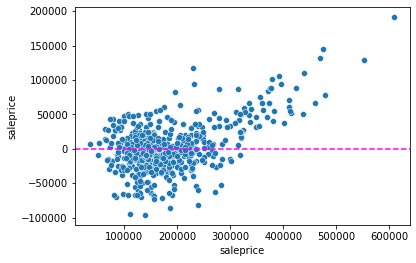

In [40]:
sns.scatterplot(x=y_test,y=test_pred)
plt.axhline(y=0,color='magenta',linestyle='--')

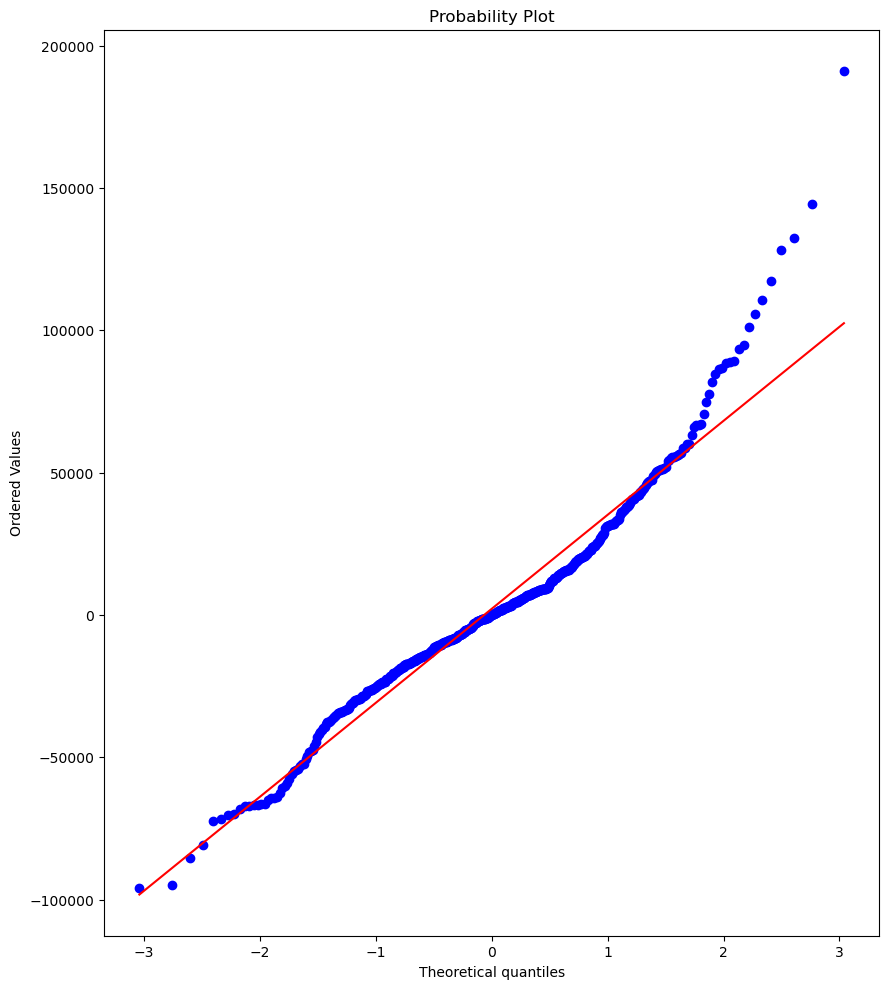

In [41]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(test_pred,plot=ax)

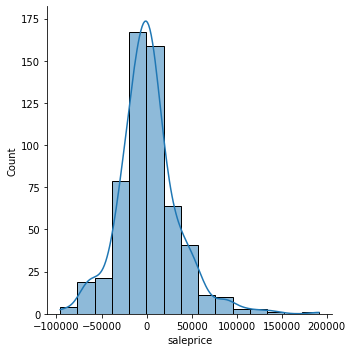

In [42]:
sns.displot(test_pred,bins=15,kde=True)

In [43]:
#dump(scaler,"cs1_Ames_Housing_scaler.pkl")

In [44]:
#dump(lasso_model,"cs1_Ames_Housing_model.h5")